In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# making input map

In [10]:
l = np.loadtxt('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt', usecols=0)
dl_tt = np.loadtxt('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt', usecols=1)
dl_te = np.loadtxt('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt', usecols=2)
dl_ee = np.loadtxt('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt', usecols=3)
dl_bb = np.loadtxt('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt', usecols=4)
dl_pp = np.loadtxt('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt', usecols=5)

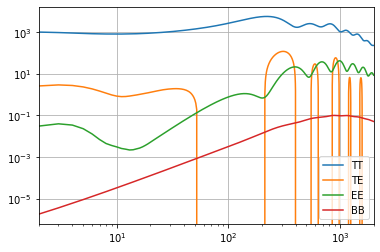

In [11]:
plt.plot(l, dl_tt, label='TT')
plt.plot(l, dl_te, label='TE')
plt.plot(l, dl_ee, label='EE')
plt.plot(l, dl_bb, label='BB')
plt.loglog()
plt.legend()
plt.xlim(2,2000)
plt.grid()

In [12]:
dl = [dl_tt, dl_ee, dl_bb, dl_te]

In [13]:
c_map = hp.synfast(dl/l/(l+1)*2*np.pi, nside=1024, new=True, lmax=2000, fwhm=np.pi/180*14/60)

/home/tama/anaconda3/lib/python3.9/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 5.945253 arcmin (0.001729 rad) 
  warnings.warn(
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 14.000000 arcmin
  warnings.warn(


/home/tama/anaconda3/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has b

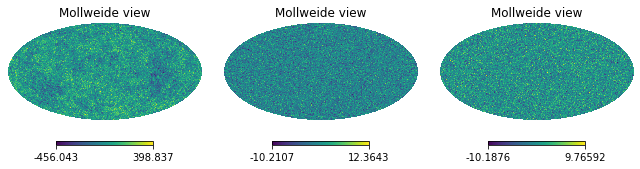

In [14]:
plt.figure(figsize=(15,6))
hp.mollview(c_map[0], sub=(1,5,1))#, norm='hist')
hp.mollview(c_map[1], sub=(1,5,2))
hp.mollview(c_map[2], sub=(1,5,3))

/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


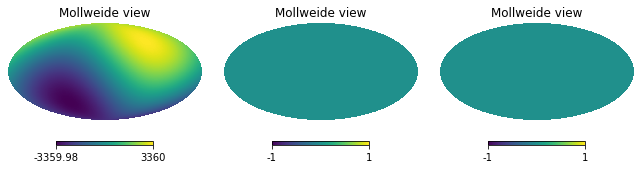

In [15]:
dipole = hp.read_map('map_cmb_dipole.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(dipole[0], sub=(1,5,1))#, norm='hist')
hp.mollview(dipole[1], sub=(1,5,2))
hp.mollview(dipole[2], sub=(1,5,3))

In [16]:
c_di = c_map + dipole
hp.write_map('c_dipole_map.fits', c_di, overwrite=True)

/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
/home/tama/anaconda3/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally regist

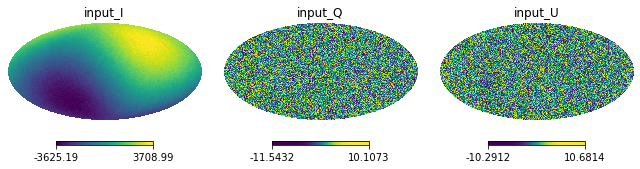

In [2]:
c_dipole = hp.read_map('c_dipole_map.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(c_dipole[0], sub=(1,5,1), title='input_I', norm='hist')#, cmap='jet')#, norm='hist')
hp.mollview(c_dipole[1], sub=(1,5,2), title='input_Q', norm='hist')
hp.mollview(c_dipole[2], sub=(1,5,3), title='input_U', norm='hist')

# Compute posterior mean and RMS

## CMB map (use cmb_c0001_k*.fits)

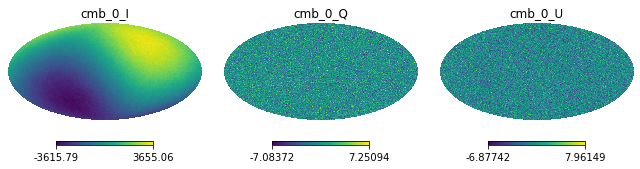

In [3]:
cmb_c0001_k000000 = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim/cmb_c0001_k000000.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(cmb_c0001_k000000[0], title='cmb_0_I', sub=(1,5,1))#, norm='hist')
hp.mollview(cmb_c0001_k000000[1], title='cmb_0_Q', sub=(1,5,2))#, norm='hist')
hp.mollview(cmb_c0001_k000000[2], title='cmb_0_U', sub=(1,5,3))#, norm='hist')

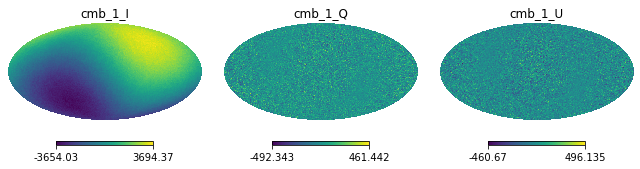

In [4]:
cmb_c0001_k000001 = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim/cmb_c0001_k000001.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(cmb_c0001_k000001[0], title='cmb_1_I', sub=(1,5,1))#, norm='hist')#, coord='E')
hp.mollview(cmb_c0001_k000001[1], title='cmb_1_Q', sub=(1,5,2))#, norm='hist')#, coord='E')
hp.mollview(cmb_c0001_k000001[2], title='cmb_1_U', sub=(1,5,3))#, norm='hist')#, coord='E')

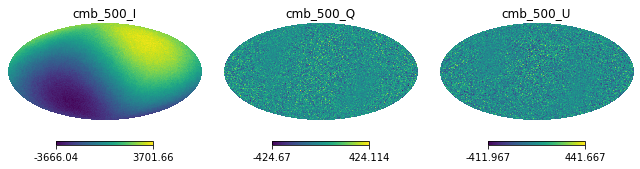

In [5]:
cmb_c0001_k000500 = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim/cmb_c0001_k000500.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(cmb_c0001_k000500[0], title='cmb_500_I', sub=(1,5,1))#, norm='hist')#, coord='E')
hp.mollview(cmb_c0001_k000500[1], title='cmb_500_Q', sub=(1,5,2))#, norm='hist')#, coord='E')
hp.mollview(cmb_c0001_k000500[2], title='cmb_500_U', sub=(1,5,3))#, norm='hist')#, coord='E')

In [8]:
num_sample = 1001

In [9]:
def get_data(map_type, start, end, field):
    data_out = []
    for k in range(start, end):
        data = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim/'+str(map_type)+'_c0001_k00'+str(str(k).zfill(4))+'.fits', field=field)
        data_out.append(data)
    data_out = np.array(data_out)
    print(data_out.shape)
    mean = np.mean(data_out, axis=0)
    rms = np.sqrt(np.mean(data_out**2, axis=0))
    std = np.std(data_out, axis=0)
    return mean, rms, std

In [31]:
cmb_mean_I, cmb_rms_I, cmb_std_I = get_data('cmb', 0, num_sample, 0)

(1001, 12582912)


In [32]:
cmb_mean_Q, cmb_rms_Q, cmb_std_Q = get_data('cmb', 0, num_sample, 1)

(1001, 12582912)


In [33]:
cmb_mean_U, cmb_rms_U, cmb_std_U = get_data('cmb', 0, num_sample, 2)

(1001, 12582912)


In [35]:
cmb_mean = [cmb_mean_I, cmb_mean_Q, cmb_mean_U]

In [36]:
cmb_rms = [cmb_rms_I, cmb_rms_Q, cmb_rms_U]

In [37]:
cmb_std = [cmb_std_I, cmb_std_Q, cmb_std_U]

In [38]:
import gc
del cmb_mean_I
del cmb_mean_Q
del cmb_mean_U
del cmb_rms_I
del cmb_rms_Q
del cmb_rms_U
del cmb_std_I
del cmb_std_Q
del cmb_std_U
gc.collect()

669

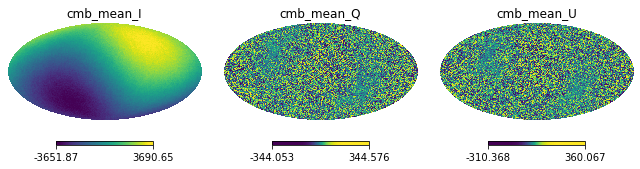

In [104]:
plt.figure(figsize=(15,6))
hp.mollview(cmb_mean[0], title='cmb_mean_I', sub=(1,5,1), norm='hist')
hp.mollview(cmb_mean[1], title='cmb_mean_Q', sub=(1,5,2), norm='hist')
hp.mollview(cmb_mean[2], title='cmb_mean_U', sub=(1,5,3), norm='hist')

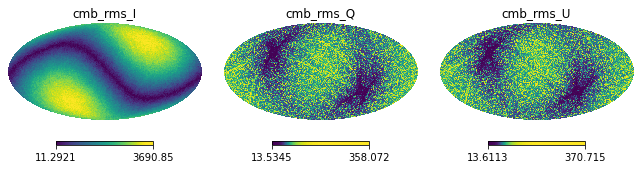

In [103]:
plt.figure(figsize=(15,6))
hp.mollview(cmb_rms[0], title='cmb_rms_I', sub=(1,5,1), norm='hist')
hp.mollview(cmb_rms[1], title='cmb_rms_Q', sub=(1,5,2), norm='hist')
hp.mollview(cmb_rms[2], title='cmb_rms_U', sub=(1,5,3), norm='hist')

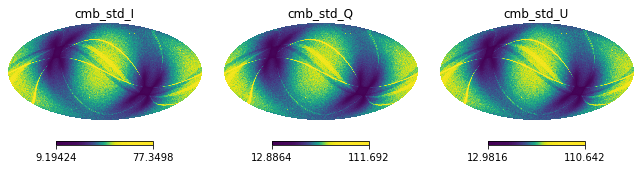

In [102]:
plt.figure(figsize=(15,6))
hp.mollview(cmb_std[0], title='cmb_std_I', sub=(1,5,1), norm='hist')
hp.mollview(cmb_std[1], title='cmb_std_Q', sub=(1,5,2), norm='hist')
hp.mollview(cmb_std[2], title='cmb_std_U', sub=(1,5,3), norm='hist')

## Frequency sky map (use tod_030_map_c0001_k*.fits)

/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))


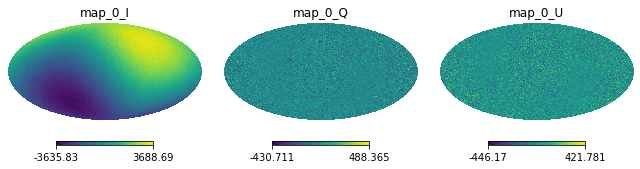

In [96]:
map_c0001_k000001 = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim/tod_030_map_c0001_k000001.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(map_c0001_k000001[0], title='map_0_I', sub=(1,5,1))#, norm='hist')
hp.mollview(map_c0001_k000001[1], title='map_0_Q', sub=(1,5,2))#, norm='hist')
hp.mollview(map_c0001_k000001[2], title='map_0_U', sub=(1,5,3))#, norm='hist')

In [5]:
map_mean, map_rms, map_std = get_data('tod_030_map', 1, num_sample, [0,1,2])

/home/tama/anaconda3/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))


(1000, 3, 3145728)


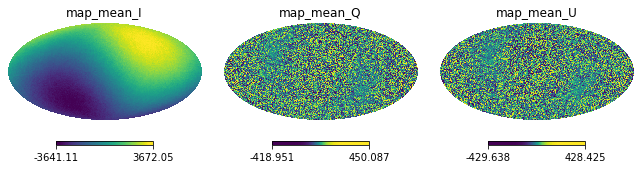

In [6]:
plt.figure(figsize=(15,6))
hp.mollview(map_mean[0], title='map_mean_I', sub=(1,5,1), norm='hist')
hp.mollview(map_mean[1], title='map_mean_Q', sub=(1,5,2), norm='hist')
hp.mollview(map_mean[2], title='map_mean_U', sub=(1,5,3), norm='hist')

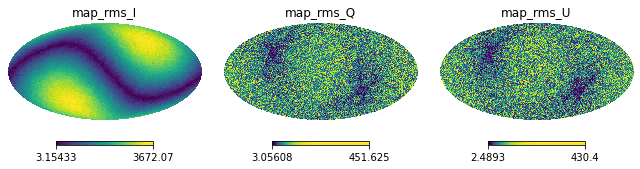

In [7]:
plt.figure(figsize=(15,6))
hp.mollview(map_rms[0], title='map_rms_I', sub=(1,5,1), norm='hist')
hp.mollview(map_rms[1], title='map_rms_Q', sub=(1,5,2), norm='hist')
hp.mollview(map_rms[2], title='map_rms_U', sub=(1,5,3), norm='hist')

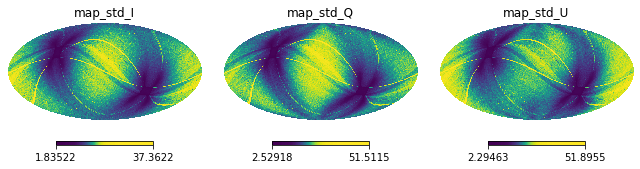

In [8]:
plt.figure(figsize=(15,6))
hp.mollview(map_std[0], title='map_std_I', sub=(1,5,1), norm='hist')
hp.mollview(map_std[1], title='map_std_Q', sub=(1,5,2), norm='hist')
hp.mollview(map_std[2], title='map_std_U', sub=(1,5,3), norm='hist')

## Correlated noise (use tod_030_ncorr_c0001_k*.fits)

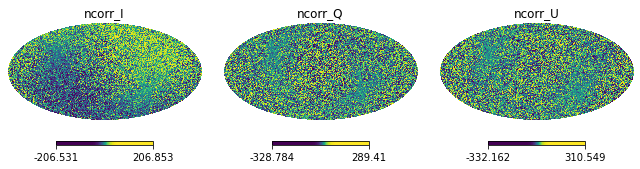

In [10]:
ncorr_c0001_k000001 = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim/tod_030_ncorr_c0001_k000001.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(ncorr_c0001_k000001[0], title='ncorr_I', sub=(1,5,1), norm='hist')
hp.mollview(ncorr_c0001_k000001[1], title='ncorr_Q', sub=(1,5,2), norm='hist')
hp.mollview(ncorr_c0001_k000001[2], title='ncorr_U', sub=(1,5,3), norm='hist')

In [11]:
ncorr_mean, ncorr_rms, ncorr_std = get_data('tod_030_ncorr', 1, num_sample, [0,1,2])

(1000, 3, 3145728)


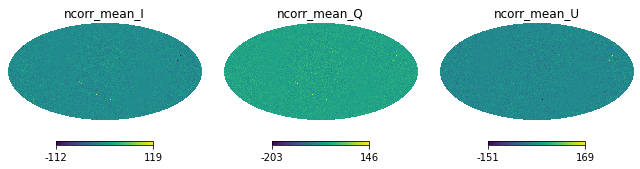

In [12]:
plt.figure(figsize=(15,6))
hp.mollview(ncorr_mean[0], title='ncorr_mean_I', sub=(1,5,1), min=-112, max=119)#, norm='hist')
hp.mollview(ncorr_mean[1], title='ncorr_mean_Q', sub=(1,5,2), min=-203, max=146)#, norm='hist')
hp.mollview(ncorr_mean[2], title='ncorr_mean_U', sub=(1,5,3), min=-151, max=169)#, norm='hist')

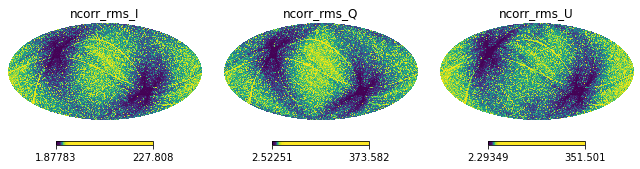

In [13]:
plt.figure(figsize=(15,6))
hp.mollview(ncorr_rms[0], title='ncorr_rms_I', sub=(1,5,1), norm='hist')
hp.mollview(ncorr_rms[1], title='ncorr_rms_Q', sub=(1,5,2), norm='hist')
hp.mollview(ncorr_rms[2], title='ncorr_rms_U', sub=(1,5,3), norm='hist')

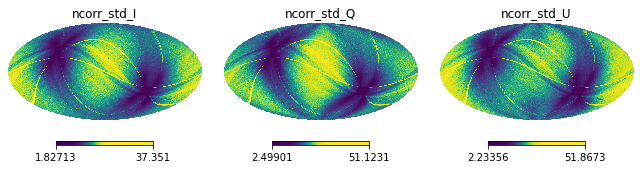

In [14]:
plt.figure(figsize=(15,6))
hp.mollview(ncorr_std[0], title='ncorr_std_I', sub=(1,5,1), norm='hist')
hp.mollview(ncorr_std[1], title='ncorr_std_Q', sub=(1,5,2), norm='hist')
hp.mollview(ncorr_std[2], title='ncorr_std_U', sub=(1,5,3), norm='hist')

## residual

res_c0001_k000001 = hp.read_map('chains_sim/res_030_c0001_k000001.fits', field=[0,1,2])
hp.mollview(res_c0001_k000001[0], norm='hist')
hp.mollview(res_c0001_k000001[1], norm='hist')
hp.mollview(res_c0001_k000001[2], norm='hist')

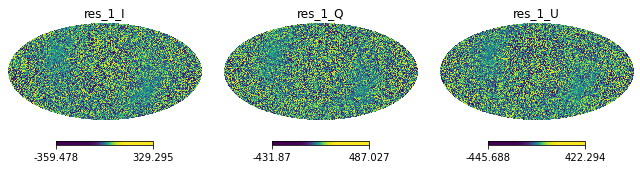

In [49]:
res_c0001_k000001 = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim/tod_030_res_c0001_k000001.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(res_c0001_k000001[0], title='res_1_I', sub=(1,5,1), norm='hist')
hp.mollview(res_c0001_k000001[1], title='res_1_Q', sub=(1,5,2), norm='hist')
hp.mollview(res_c0001_k000001[2], title='res_1_U', sub=(1,5,3), norm='hist')

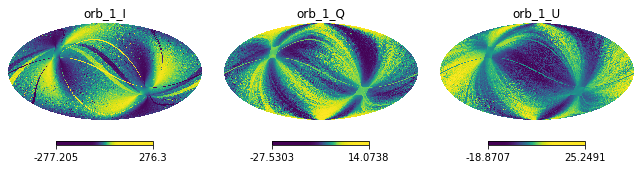

In [50]:
orb_c0001_k000001 = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim/tod_030_orb_c0001_k000001.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(orb_c0001_k000001[0], title='orb_1_I', sub=(1,5,1), norm='hist')
hp.mollview(orb_c0001_k000001[1], title='orb_1_Q', sub=(1,5,2), norm='hist')
hp.mollview(orb_c0001_k000001[2], title='orb_1_U', sub=(1,5,3), norm='hist')

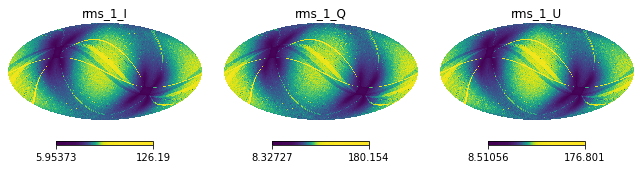

In [51]:
rms_c0001_k000001 = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim/tod_030_rms_c0001_k000001.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(rms_c0001_k000001[0], title='rms_1_I', sub=(1,5,1), norm='hist')
hp.mollview(rms_c0001_k000001[1], title='rms_1_Q', sub=(1,5,2), norm='hist')
hp.mollview(rms_c0001_k000001[2], title='rms_1_U', sub=(1,5,3), norm='hist')

# Compute (posterior mean - input)/posterior rms for each quantity, and compare with an N(0,1) distribution

## input

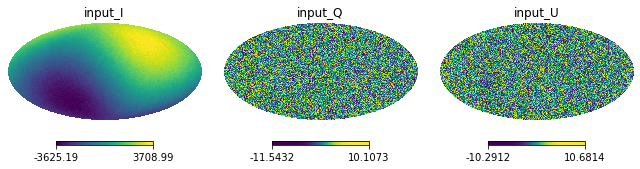

In [20]:
plt.figure(figsize=(15,6))
hp.mollview(c_dipole[0], sub=(1,5,1), title='input_I', norm='hist')#, cmap='jet')#, norm='hist')
hp.mollview(c_dipole[1], sub=(1,5,2), title='input_Q', norm='hist')
hp.mollview(c_dipole[2], sub=(1,5,3), title='input_U', norm='hist')

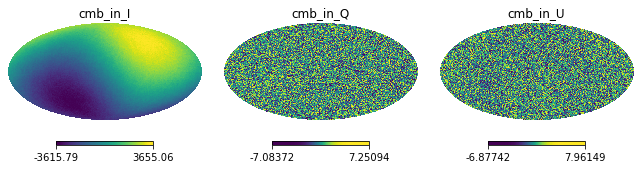

In [9]:
cmb_c0001_k000000_in, cmb_in_head = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim_input/cmb_c0001_k000000.fits', field=[0,1,2], h=True)
plt.figure(figsize=(15,6))
hp.mollview(cmb_c0001_k000000_in[0], title='cmb_in_I', sub=(1,5,1), norm='hist')
hp.mollview(cmb_c0001_k000000_in[1], title='cmb_in_Q', sub=(1,5,2), norm='hist')
hp.mollview(cmb_c0001_k000000_in[2], title='cmb_in_U', sub=(1,5,3), norm='hist')

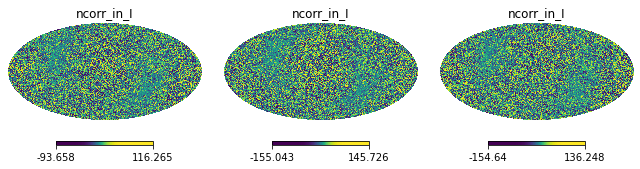

In [15]:
ncorr_c0001_k000001_in = hp.read_map('/home/tamaki2/Commander/AST9240/chains_sim_input/tod_030_ncorr_c0001_k000001.fits', field=[0,1,2])
plt.figure(figsize=(15,6))
hp.mollview(ncorr_c0001_k000001_in[0], title='ncorr_in_I', sub=(1,5,1), norm='hist')
hp.mollview(ncorr_c0001_k000001_in[1], title='ncorr_in_I', sub=(1,5,2), norm='hist')
hp.mollview(ncorr_c0001_k000001_in[2], title='ncorr_in_I', sub=(1,5,3), norm='hist')

## (posterior mean - input)/posterior rms

In [16]:
def cal(mean, rms, std, data_in):
    cal_rms = (mean-data_in)/rms
    cal_std = (mean-data_in)/std
    return cal_rms, cal_std

### CMB nap

In [57]:
cmb_calr, cmb_cals = cal(cmb_mean, cmb_rms, cmb_std, c_dipole)

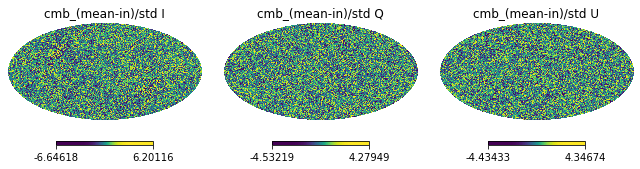

In [59]:
plt.figure(figsize=(15,6))
hp.mollview(cmb_cals[0], title='cmb_(mean-in)/std I', sub=(1,5,1), norm='hist')
hp.mollview(cmb_cals[1], title='cmb_(mean-in)/std Q', sub=(1,5,2), norm='hist')
hp.mollview(cmb_cals[2], title='cmb_(mean-in)/std U', sub=(1,5,3), norm='hist')

In [21]:
x = np.linspace(-6, 6,10000)
y = np.exp(-x**2/2)/np.sqrt(2*np.pi)

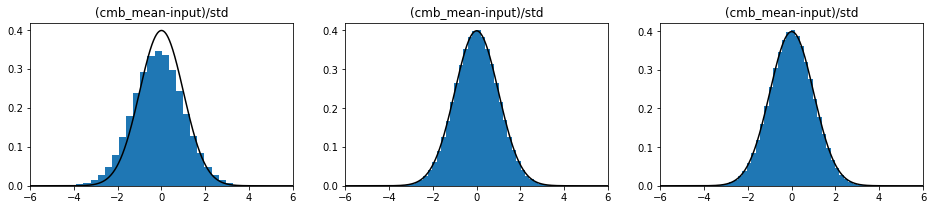

In [62]:
fig = plt.figure(figsize=(16,3))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.plot(x, y, color='black')
    ax.set_xlim(-6,6)
    ax.hist(cmb_cals[i], density=True, bins=50)
    ax.set_title('(cmb_mean-input)/std')

### Frequency map

In [66]:
np.sqrt(len(map_mean[0])/12)

512.0

In [67]:
np.sqrt(len(c_dipole[0])/12)

1024.0

In [12]:
c_dipole_512 = hp.ud_grade(c_dipole, 512)

In [13]:
map_calr, map_cals = cal(map_mean, map_rms, map_std, c_dipole_512)

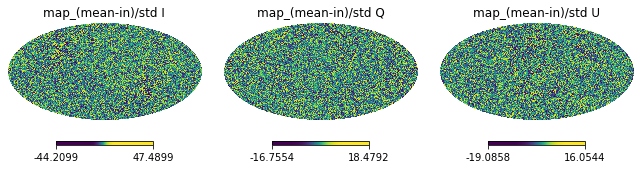

In [15]:
plt.figure(figsize=(15,6))
hp.mollview(map_cals[0], title='map_(mean-in)/std I', sub=(1,5,1), norm='hist')
hp.mollview(map_cals[1], title='map_(mean-in)/std Q', sub=(1,5,2), norm='hist')
hp.mollview(map_cals[2], title='map_(mean-in)/std U', sub=(1,5,3), norm='hist')

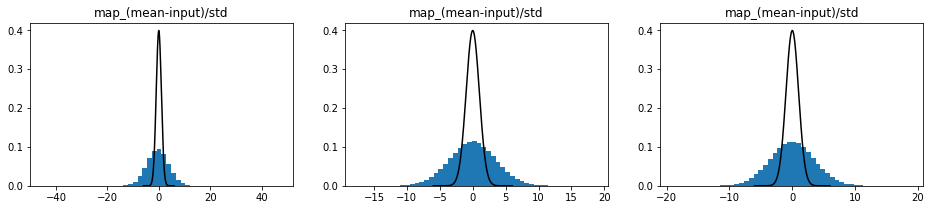

In [19]:
fig = plt.figure(figsize=(16,3))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.plot(x, y, color='black')
    #ax.set_xlim(-6,6)
    ax.hist(map_cals[i], density=True, bins=50)
    ax.set_title('map_(mean-input)/std')

### Correlated noise map

In [17]:
ncorr_calr, ncorr_cals = cal(ncorr_mean, ncorr_rms, ncorr_std, ncorr_c0001_k000001_in)

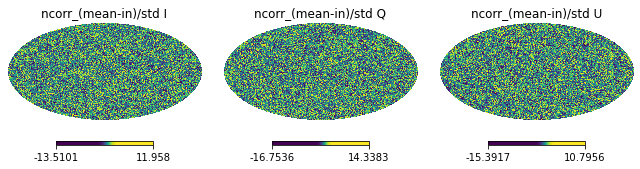

In [18]:
plt.figure(figsize=(15,6))
hp.mollview(ncorr_cals[0], title='ncorr_(mean-in)/std I', sub=(1,5,1), norm='hist')
hp.mollview(ncorr_cals[1], title='ncorr_(mean-in)/std Q', sub=(1,5,2), norm='hist')
hp.mollview(ncorr_cals[2], title='ncorr_(mean-in)/std U', sub=(1,5,3), norm='hist')

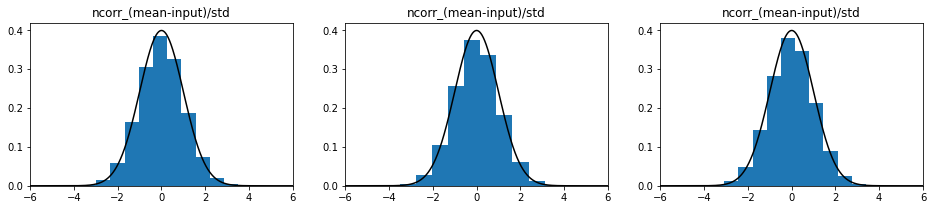

In [24]:
fig = plt.figure(figsize=(16,3))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.plot(x, y, color='black')
    ax.set_xlim(-6,6)
    ax.hist(ncorr_cals[i], bins=50, density=True)
    #ax.set_yscale("log")
    ax.set_title('ncorr_(mean-input)/std')